In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split

In [2]:
with_mask_files = os.listdir('with_mask')
print(with_mask_files[0:5])

['0-with-mask.jpg', '1-with-mask.jpg', '10-with-mask.jpg', '100-with-mask.jpg', '101-with-mask.jpg']


In [3]:
without_mask_files = os.listdir('without_mask')
print(without_mask_files[0:5])
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg']
Number of with mask images: 686
Number of without mask images: 686


In [4]:
with_mask_labels = [1]*686
without_mask_labels = [0]*686

In [5]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])
print(len(with_mask_labels))
print(len(without_mask_labels))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
686
686


In [6]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

1372
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


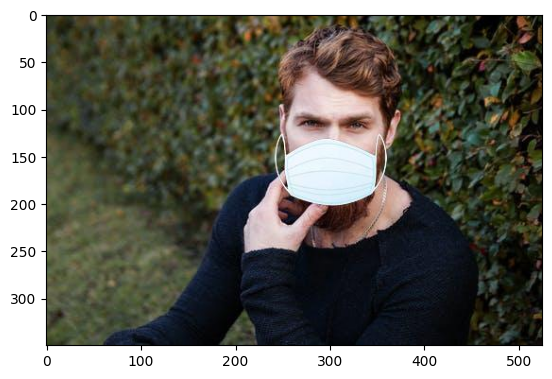

In [7]:
import matplotlib.image as mpimg
img = mpimg.imread('with_mask/0-with-mask.jpg')
imgplot = plt.imshow(img)
plt.show()

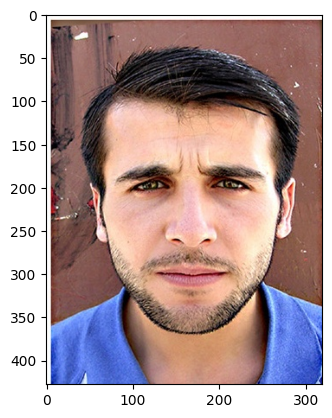

In [8]:
img = mpimg.imread('without_mask/101.jpg')
imgplot = plt.imshow(img)
plt.show()

In [9]:
with_mask_path = 'with_mask'
import os
from PIL import Image

data = []
for img_file in with_mask_files:
    full_path = os.path.join(with_mask_path, img_file)
    if os.path.exists(full_path):
        image = Image.open(full_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)
    else:
        print(f"File not found: {full_path}")

without_mask_path = 'without_mask'
data = []
for img_file in without_mask_files:
    full_path = os.path.join(without_mask_path, img_file)
    if os.path.exists(full_path):
        image = Image.open(full_path)
        image = image.resize((128, 128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)
    else:
        print(f"File not found: {full_path}")

In [10]:
type(data)

list

In [11]:
len(data)

686

In [12]:
data[0]

array([[[ 10,   6,  21],
        [ 10,   6,  21],
        [ 10,   6,  21],
        ...,
        [ 26,  17,  34],
        [ 25,  18,  34],
        [ 26,  20,  35]],

       [[ 11,   6,  25],
        [ 11,   6,  25],
        [ 11,   6,  25],
        ...,
        [ 18,  13,  28],
        [ 18,  15,  30],
        [ 20,  17,  32]],

       [[ 11,   6,  28],
        [ 10,   5,  27],
        [  9,   4,  26],
        ...,
        [  4,   3,  18],
        [  5,   5,  18],
        [  6,   5,  19]],

       ...,

       [[182,   3,  86],
        [185,   5,  83],
        [172,   5,  69],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[175,   5,  79],
        [174,   6,  73],
        [160,   8,  60],
        ...,
        [  0,   1,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[164,   5,  71],
        [159,   4,  63],
        [148,   9,  55],
        ...,
        [  0,   1,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [13]:
type(data[0])

numpy.ndarray

In [14]:
data[0].shape

(128, 128, 3)

In [15]:
X = np.array(data)
Y = np.array(labels)
type(X)

numpy.ndarray

In [16]:
type(Y)

numpy.ndarray

In [17]:
print(X.shape)

(686, 128, 128, 3)


In [18]:
print(Y.shape)
Y = Y.reshape(686, 2)


(1372,)


In [19]:
print(Y)

[[1 1]
 [1 1]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [21]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (548, 128, 128, 3)
X_test: (138, 128, 128, 3)
Y_train: (548, 2)
Y_test: (138, 2)


In [22]:
X_train = X_train/255

X_test = X_test/255

In [23]:
X_train[0]

array([[[1.        , 0.99607843, 1.        ],
        [0.99607843, 0.99607843, 0.98823529],
        [0.99215686, 1.        , 0.98039216],
        ...,
        [0.48235294, 0.34509804, 0.23529412],
        [0.4745098 , 0.3254902 , 0.22745098],
        [0.45882353, 0.30196078, 0.21568627]],

       [[1.        , 0.99607843, 1.        ],
        [0.99607843, 1.        , 0.99607843],
        [0.99607843, 1.        , 0.99215686],
        ...,
        [0.53333333, 0.41568627, 0.30588235],
        [0.52156863, 0.4       , 0.28235294],
        [0.50588235, 0.37254902, 0.25490196]],

       [[1.        , 1.        , 0.99215686],
        [1.        , 1.        , 1.        ],
        [0.99215686, 1.        , 1.        ],
        ...,
        [0.44705882, 0.30588235, 0.34509804],
        [0.4627451 , 0.31372549, 0.35294118],
        [0.44705882, 0.28627451, 0.33333333]],

       ...,

       [[1.        , 1.        , 1.        ],
        [0.99607843, 1.        , 0.99607843],
        [1.        , 1

In [24]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# If labels are binary (0/1) but wrongly shaped:
Y_train = np.argmax(Y_train.reshape(Y_train.shape[0], -1), axis=1)
Y_test  = np.argmax(Y_test.reshape(Y_test.shape[0], -1), axis=1)

# Convert to one-hot with 2 classes
Y_train = to_categorical(Y_train, num_classes=2)
Y_test  = to_categorical(Y_test, num_classes=2)

print("Fixed Y_train shape:", Y_train.shape)  # should be (548, 2)
print("Fixed Y_test shape:", Y_test.shape)    # should be (138, 2)


Fixed Y_train shape: (548, 2)
Fixed Y_test shape: (138, 2)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),


    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),   # smaller dropout
    Dense(2, activation='softmax')   # final output
])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


C:\Users\Aashutosh Kumar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.fit(X_train, Y_train,validation_data=(X_test, Y_test),epochs=10,batch_size=32)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 477ms/step - accuracy: 0.8772 - loss: 0.3824 - val_accuracy: 0.6522 - val_loss: 5.1550
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 427ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.0000e+00 - val_loss: 36.3087
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 427ms/step - accuracy: 0.9972 - loss: 0.3729 - val_accuracy: 0.0000e+00 - val_loss: 52.0419
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 427ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.4058 - val_loss: 18.6534
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 433ms/step - accuracy: 0.9976 - loss: 0.0240 - val_accuracy: 0.7391 - val_loss: 3.7678
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 428ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.5145 - val_loss: 12.8270
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 426ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.3913 - val_loss: 20.7502
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 429ms/step - accuracy: 1.0000 - loss:

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)


In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    validation_data=(X_test, Y_test),
    epochs=5
)


C:\Users\Aashutosh Kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 454ms/step - accuracy: 0.9991 - loss: 0.0095 - val_accuracy: 0.9493 - val_loss: 3.4504
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 446ms/step - accuracy: 1.0000 - loss: 3.3249e-08 - val_accuracy: 0.9638 - val_loss: 3.0207
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 454ms/step - accuracy: 0.9960 - loss: 0.0592 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 450ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 449ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


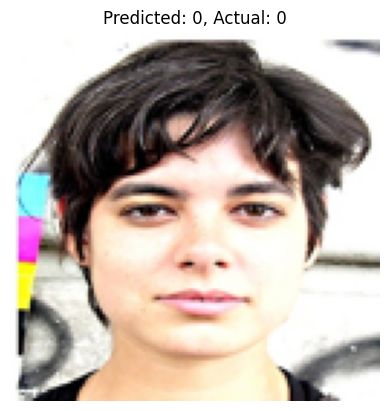

Prediction probabilities: [[1. 0.]]


In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Pick a test image
index = 5   # change index to see different test images
img = X_test[index]
pred = model.predict(np.expand_dims(img, axis=0))
pred_class = np.argmax(pred, axis=1)[0]
true_class = np.argmax(Y_test[index])

# Show image
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted: {pred_class}, Actual: {true_class}")
plt.show()

print("Prediction probabilities:", pred)


In [30]:
import cv2
import numpy as np

input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

cv2.imshow("Input Image", input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized / 255.0
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)
input_pred_label = np.argmax(input_prediction)

print("Prediction probabilities:", input_prediction)
print("Predicted class:", input_pred_label)

if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')


Path of the image to be predicted:  IMG_20230605_230753.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Prediction probabilities: [[1. 0.]]
Predicted class: 0
The person in the image is not wearing a mask


In [31]:
import cv2
import numpy as np

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (128,128))
        face_scaled = face_resized / 255.0
        face_reshaped = np.reshape(face_scaled, [1,128,128,3])
        prediction = model.predict(face_reshaped)
        pred_label = np.argmax(prediction)

        if pred_label == 1:
            text, color = "Mask", (0,255,0)
        else:
            text, color = "No Mask", (0,0,255)

        cv2.rectangle(frame, (x,y), (x+w,y+h), color, 2)
        cv2.putText(frame, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    cv2.imshow("Mask Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━